# Exploratory Data Analysis (EDA)

## Libraries

In [3]:
from utils import *
from load_data import *
from process_data import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Naive Classifiers

### Análisis General

In [2]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

# Define class probabilities based on the "Count After" values
P_positivo = 1283 / 1650
P_negativo = 367 / 1650

# Define the number of samples (same as Count After)
n_samples = 1650

# Number of simulations
n_simulations = 10000

# Store results for accuracy and F1-Score
accuracy_majority = []
f1_majority_positivo = []
f1_majority_negativo = []
weighted_f1_majority = []

accuracy_random = []
f1_random_positivo = []
f1_random_negativo = []
weighted_f1_random = []

for _ in range(n_simulations):
    # Generate true labels based on the given probabilities
    true_labels = np.random.choice(
        ["Comentario Positivo", "Comentario Negativo"], size=n_samples, p=[P_positivo, P_negativo]
    )
    
    # --- Majority Classifier ---
    pred_majority = np.array(["Comentario Positivo"] * n_samples)
    acc_majority = accuracy_score(true_labels, pred_majority)
    f1_majority_pos = f1_score(true_labels, pred_majority, pos_label="Comentario Positivo")
    f1_majority_neg = f1_score(true_labels, pred_majority, pos_label="Comentario Negativo")
    
    accuracy_majority.append(acc_majority)
    f1_majority_positivo.append(f1_majority_pos)
    f1_majority_negativo.append(f1_majority_neg)
    
    # Calculate weighted F1-Score for the majority classifier
    weighted_f1_majority.append(
        (P_positivo * f1_majority_pos) + (P_negativo * f1_majority_neg)
    )
    
    # --- Random Classifier ---
    pred_random = np.random.choice(
        ["Comentario Positivo", "Comentario Negativo"], size=n_samples, p=[P_positivo, P_negativo]
    )
    acc_random = accuracy_score(true_labels, pred_random)
    f1_random_pos = f1_score(true_labels, pred_random, pos_label="Comentario Positivo")
    f1_random_neg = f1_score(true_labels, pred_random, pos_label="Comentario Negativo")
    
    accuracy_random.append(acc_random)
    f1_random_positivo.append(f1_random_pos)
    f1_random_negativo.append(f1_random_neg)
    
    # Calculate weighted F1-Score for the random classifier
    weighted_f1_random.append(
        (P_positivo * f1_random_pos) + (P_negativo * f1_random_neg)
    )

# Convert results to numpy arrays for easier statistical computation
accuracy_majority = np.array(accuracy_majority)
f1_majority_positivo = np.array(f1_majority_positivo)
f1_majority_negativo = np.array(f1_majority_negativo)
weighted_f1_majority = np.array(weighted_f1_majority)

accuracy_random = np.array(accuracy_random)
f1_random_positivo = np.array(f1_random_positivo)
f1_random_negativo = np.array(f1_random_negativo)
weighted_f1_random = np.array(weighted_f1_random)

# Calculate mean and standard deviation for Majority Classifier
mean_acc_majority = np.mean(accuracy_majority)
std_acc_majority = np.std(accuracy_majority)
mean_f1_majority_pos = np.mean(f1_majority_positivo)
std_f1_majority_pos = np.std(f1_majority_positivo)
mean_f1_majority_neg = np.mean(f1_majority_negativo)
std_f1_majority_neg = np.std(f1_majority_negativo)
mean_weighted_f1_majority = np.mean(weighted_f1_majority)
std_weighted_f1_majority = np.std(weighted_f1_majority)

# Calculate mean and standard deviation for Random Classifier
mean_acc_random = np.mean(accuracy_random)
std_acc_random = np.std(accuracy_random)
mean_f1_random_pos = np.mean(f1_random_positivo)
std_f1_random_pos = np.std(f1_random_positivo)
mean_f1_random_neg = np.mean(f1_random_negativo)
std_f1_random_neg = np.std(f1_random_negativo)
mean_weighted_f1_random = np.mean(weighted_f1_random)
std_weighted_f1_random = np.std(weighted_f1_random)

KeyboardInterrupt: 

In [ ]:
# Print results for Majority Classifier
print("Majority Classifier:")
print(f"Mean Accuracy: {mean_acc_majority:.3f}, Std Dev Accuracy: {std_acc_majority:.3f}")
print(f"Mean F1-Score (Positivo): {mean_f1_majority_pos:.3f}, Std Dev F1-Score (Positivo): {std_f1_majority_pos:.3f}")
print(f"Mean F1-Score (Negativo): {mean_f1_majority_neg:.3f}, Std Dev F1-Score (Negativo): {std_f1_majority_neg:.3f}")
print(f"Weighted Average F1-Score: {mean_weighted_f1_majority:.3f}, Std Dev Weighted F1-Score: {std_weighted_f1_majority:.3f}")

# Print results for Random Classifier
print("\nRandom Classifier:")
print(f"Mean Accuracy: {mean_acc_random:.3f}, Std Dev Accuracy: {std_acc_random:.3f}")
print(f"Mean F1-Score (Positivo): {mean_f1_random_pos:.3f}, Std Dev F1-Score (Positivo): {std_f1_random_pos:.3f}")
print(f"Mean F1-Score (Negativo): {mean_f1_random_neg:.3f}, Std Dev F1-Score (Negativo): {std_f1_random_neg:.3f}")
print(f"Weighted Average F1-Score: {mean_weighted_f1_random:.3f}, Std Dev Weighted F1-Score: {std_weighted_f1_random:.3f}")

Majority Classifier:
Mean Accuracy: 0.778, Std Dev Accuracy: 0.010
Mean F1-Score (Positivo): 0.875, Std Dev F1-Score (Positivo): 0.006
Mean F1-Score (Negativo): 0.000, Std Dev F1-Score (Negativo): 0.000
Weighted Average F1-Score: 0.680, Std Dev Weighted F1-Score: 0.005

Random Classifier:
Mean Accuracy: 0.654, Std Dev Accuracy: 0.012
Mean F1-Score (Positivo): 0.778, Std Dev F1-Score (Positivo): 0.009
Mean F1-Score (Negativo): 0.222, Std Dev F1-Score (Negativo): 0.021
Weighted Average F1-Score: 0.654, Std Dev Weighted F1-Score: 0.009


### Contenido Negativo

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

# Define class probabilities based on the "Count After" values
P_deportista_autora = 148 / 352
P_victima = 71 / 352
P_acto = 73 / 352
P_insultos = 60 / 352

# Define the classes and their probabilities
classes = ["Desprestigiar Deportista Autora", "Desprestigiar Víctima", "Desprestigiar Acto", "Insultos"]
probabilities = [P_deportista_autora, P_victima, P_acto, P_insultos]

# Define the number of samples (same as Count After)
n_samples = 352

# Number of simulations
n_simulations = 10000

# Store results for accuracy and F1-Score for Majority Classifier
accuracy_majority = []
f1_majority = {cls: [] for cls in classes}
weighted_f1_majority = []

# Store results for Random Classifier
accuracy_random = []
f1_random = {cls: [] for cls in classes}
weighted_f1_random = []

for _ in range(n_simulations):
    # Generate true labels based on the given probabilities
    true_labels = np.random.choice(classes, size=n_samples, p=probabilities)
    
    # --- Majority Classifier (always predict Desprestigiar Deportista Autora) ---
    pred_majority = np.array(["Desprestigiar Deportista Autora"] * n_samples)
    acc_majority = accuracy_score(true_labels, pred_majority)
    accuracy_majority.append(acc_majority)
    
    # Calculate individual F1-Scores for each class
    f1_scores_majority = f1_score(true_labels, pred_majority, labels=classes, average=None)
    
    # Store F1-Scores for each class
    for i, cls in enumerate(classes):
        f1_majority[cls].append(f1_scores_majority[i])
    
    # Calculate and store weighted average F1-Score for the majority classifier
    weighted_f1_majority.append(f1_score(true_labels, pred_majority, average="weighted", labels=classes))

    # --- Random Classifier ---
    pred_random = np.random.choice(classes, size=n_samples, p=probabilities)
    acc_random = accuracy_score(true_labels, pred_random)
    accuracy_random.append(acc_random)
    
    # Calculate individual F1-Scores for each class
    f1_scores_random = f1_score(true_labels, pred_random, labels=classes, average=None)
    
    # Store F1-Scores for each class
    for i, cls in enumerate(classes):
        f1_random[cls].append(f1_scores_random[i])
    
    # Calculate and store weighted average F1-Score for the random classifier
    weighted_f1_random.append(f1_score(true_labels, pred_random, average="weighted", labels=classes))

# Convert results to numpy arrays for easier statistical computation
accuracy_majority = np.array(accuracy_majority)
for cls in classes:
    f1_majority[cls] = np.array(f1_majority[cls])

weighted_f1_majority = np.array(weighted_f1_majority)

accuracy_random = np.array(accuracy_random)
for cls in classes:
    f1_random[cls] = np.array(f1_random[cls])

weighted_f1_random = np.array(weighted_f1_random)

# Calculate mean and standard deviation for Majority Classifier
mean_acc_majority = np.mean(accuracy_majority)
std_acc_majority = np.std(accuracy_majority)

mean_f1_majority = {cls: np.mean(f1_majority[cls]) for cls in classes}
std_f1_majority = {cls: np.std(f1_majority[cls]) for cls in classes}
mean_weighted_f1_majority = np.mean(weighted_f1_majority)
std_weighted_f1_majority = np.std(weighted_f1_majority)

# Calculate mean and standard deviation for Random Classifier
mean_acc_random = np.mean(accuracy_random)
std_acc_random = np.std(accuracy_random)

mean_f1_random = {cls: np.mean(f1_random[cls]) for cls in classes}
std_f1_random = {cls: np.std(f1_random[cls]) for cls in classes}
mean_weighted_f1_random = np.mean(weighted_f1_random)
std_weighted_f1_random = np.std(weighted_f1_random)

In [ ]:
# Print results for Majority Classifier
print("Majority Classifier:")
print(f"Mean Accuracy: {mean_acc_majority:.3f}, Std Dev Accuracy: {std_acc_majority:.3f}")
for cls in classes:
    print(f"Mean F1-Score ({cls}): {mean_f1_majority[cls]:.3f}, Std Dev F1-Score ({cls}): {std_f1_majority[cls]:.3f}")
print(f"Weighted Average F1-Score: {mean_weighted_f1_majority:.3f}, Std Dev Weighted F1-Score: {std_weighted_f1_majority:.3f}")

# Print results for Random Classifier
print("\nRandom Classifier:")
print(f"Mean Accuracy: {mean_acc_random:.3f}, Std Dev Accuracy: {std_acc_random:.3f}")
for cls in classes:
    print(f"Mean F1-Score ({cls}): {mean_f1_random[cls]:.3f}, Std Dev F1-Score ({cls}): {std_f1_random[cls]:.3f}")
print(f"Weighted Average F1-Score: {mean_weighted_f1_random:.3f}, Std Dev Weighted F1-Score: {std_weighted_f1_random:.3f}")

Majority Classifier:
Mean Accuracy: 0.421, Std Dev Accuracy: 0.027
Mean F1-Score (Desprestigiar Deportista Autora): 0.592, Std Dev F1-Score (Desprestigiar Deportista Autora): 0.026
Mean F1-Score (Desprestigiar Víctima): 0.000, Std Dev F1-Score (Desprestigiar Víctima): 0.000
Mean F1-Score (Desprestigiar Acto): 0.000, Std Dev F1-Score (Desprestigiar Acto): 0.000
Mean F1-Score (Insultos): 0.000, Std Dev F1-Score (Insultos): 0.000
Weighted Average F1-Score: 0.250, Std Dev Weighted F1-Score: 0.027

Random Classifier:
Mean Accuracy: 0.289, Std Dev Accuracy: 0.024
Mean F1-Score (Desprestigiar Deportista Autora): 0.420, Std Dev F1-Score (Desprestigiar Deportista Autora): 0.036
Mean F1-Score (Desprestigiar Víctima): 0.201, Std Dev F1-Score (Desprestigiar Víctima): 0.046
Mean F1-Score (Desprestigiar Acto): 0.205, Std Dev F1-Score (Desprestigiar Acto): 0.045
Mean F1-Score (Insultos): 0.169, Std Dev F1-Score (Insultos): 0.047
Weighted Average F1-Score: 0.289, Std Dev Weighted F1-Score: 0.025


### Insultos

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

# Define class probabilities based on the "Count After" values
P_Deseo_de_Dañar = 58 / 206
P_Genéricos = 100 / 206
P_Sexistas_Misóginos = 48 / 206

# Define the classes and their probabilities
classes = ["Deseo de Dañar", "Genéricos", "Sexistas / Misóginos"]
probabilities = [P_Deseo_de_Dañar, P_Genéricos, P_Sexistas_Misóginos]

# Define the number of samples (same as Count After)
n_samples = 206

# Number of simulations
n_simulations = 10000

# Store results for accuracy and F1-Score for Majority Classifier
accuracy_majority = []
f1_majority = {cls: [] for cls in classes}
weighted_f1_majority = []

# Store results for Random Classifier
accuracy_random = []
f1_random = {cls: [] for cls in classes}
weighted_f1_random = []

for _ in range(n_simulations):
    # Generate true labels based on the given probabilities
    true_labels = np.random.choice(classes, size=n_samples, p=probabilities)
    
    # --- Majority Classifier (always predict the majority class) ---
    pred_majority = np.array(["Genéricos"] * n_samples)
    acc_majority = accuracy_score(true_labels, pred_majority)
    accuracy_majority.append(acc_majority)
    
    # Calculate individual F1-Scores for each class
    f1_scores_majority = f1_score(true_labels, pred_majority, labels=classes, average=None)
    
    # Store F1-Scores for each class
    for i, cls in enumerate(classes):
        f1_majority[cls].append(f1_scores_majority[i])
    
    # Calculate and store weighted average F1-Score for the majority classifier
    weighted_f1_majority.append(f1_score(true_labels, pred_majority, average="weighted", labels=classes))

    # --- Random Classifier ---
    pred_random = np.random.choice(classes, size=n_samples, p=probabilities)
    acc_random = accuracy_score(true_labels, pred_random)
    accuracy_random.append(acc_random)
    
    # Calculate individual F1-Scores for each class
    f1_scores_random = f1_score(true_labels, pred_random, labels=classes, average=None)
    
    # Store F1-Scores for each class
    for i, cls in enumerate(classes):
        f1_random[cls].append(f1_scores_random[i])
    
    # Calculate and store weighted average F1-Score for the random classifier
    weighted_f1_random.append(f1_score(true_labels, pred_random, average="weighted", labels=classes))

# Convert results to numpy arrays for easier statistical computation
accuracy_majority = np.array(accuracy_majority)
for cls in classes:
    f1_majority[cls] = np.array(f1_majority[cls])

weighted_f1_majority = np.array(weighted_f1_majority)

accuracy_random = np.array(accuracy_random)
for cls in classes:
    f1_random[cls] = np.array(f1_random[cls])

weighted_f1_random = np.array(weighted_f1_random)

# Calculate mean and standard deviation for Majority Classifier
mean_acc_majority = np.mean(accuracy_majority)
std_acc_majority = np.std(accuracy_majority)

mean_f1_majority = {cls: np.mean(f1_majority[cls]) for cls in classes}
std_f1_majority = {cls: np.std(f1_majority[cls]) for cls in classes}
mean_weighted_f1_majority = np.mean(weighted_f1_majority)
std_weighted_f1_majority = np.std(weighted_f1_majority)

# Calculate mean and standard deviation for Random Classifier
mean_acc_random = np.mean(accuracy_random)
std_acc_random = np.std(accuracy_random)

mean_f1_random = {cls: np.mean(f1_random[cls]) for cls in classes}
std_f1_random = {cls: np.std(f1_random[cls]) for cls in classes}
mean_weighted_f1_random = np.mean(weighted_f1_random)
std_weighted_f1_random = np.std(weighted_f1_random)

In [ ]:
# Print results for Majority Classifier
print("Majority Classifier:")
print(f"Mean Accuracy: {mean_acc_majority:.3f}, Std Dev Accuracy: {std_acc_majority:.3f}")
for cls in classes:
    print(f"Mean F1-Score ({cls}): {mean_f1_majority[cls]:.3f}, Std Dev F1-Score ({cls}): {std_f1_majority[cls]:.3f}")
print(f"Weighted Average F1-Score: {mean_weighted_f1_majority:.3f}, Std Dev Weighted F1-Score: {std_weighted_f1_majority:.3f}")

# Print results for Random Classifier
print("\nRandom Classifier:")
print(f"Mean Accuracy: {mean_acc_random:.3f}, Std Dev Accuracy: {std_acc_random:.3f}")
for cls in classes:
    print(f"Mean F1-Score ({cls}): {mean_f1_random[cls]:.3f}, Std Dev F1-Score ({cls}): {std_f1_random[cls]:.3f}")
print(f"Weighted Average F1-Score: {mean_weighted_f1_random:.3f}, Std Dev Weighted F1-Score: {std_weighted_f1_random:.3f}")

Majority Classifier:
Mean Accuracy: 0.485, Std Dev Accuracy: 0.035
Mean F1-Score (Deseo de Dañar): 0.000, Std Dev F1-Score (Deseo de Dañar): 0.000
Mean F1-Score (Genéricos): 0.653, Std Dev F1-Score (Genéricos): 0.032
Mean F1-Score (Sexistas / Misóginos): 0.000, Std Dev F1-Score (Sexistas / Misóginos): 0.000
Weighted Average F1-Score: 0.318, Std Dev Weighted F1-Score: 0.038

Random Classifier:
Mean Accuracy: 0.369, Std Dev Accuracy: 0.033
Mean F1-Score (Deseo de Dañar): 0.279, Std Dev F1-Score (Deseo de Dañar): 0.055
Mean F1-Score (Genéricos): 0.484, Std Dev F1-Score (Genéricos): 0.043
Mean F1-Score (Sexistas / Misóginos): 0.231, Std Dev F1-Score (Sexistas / Misóginos): 0.057
Weighted Average F1-Score: 0.369, Std Dev Weighted F1-Score: 0.034


## Gantt Chart

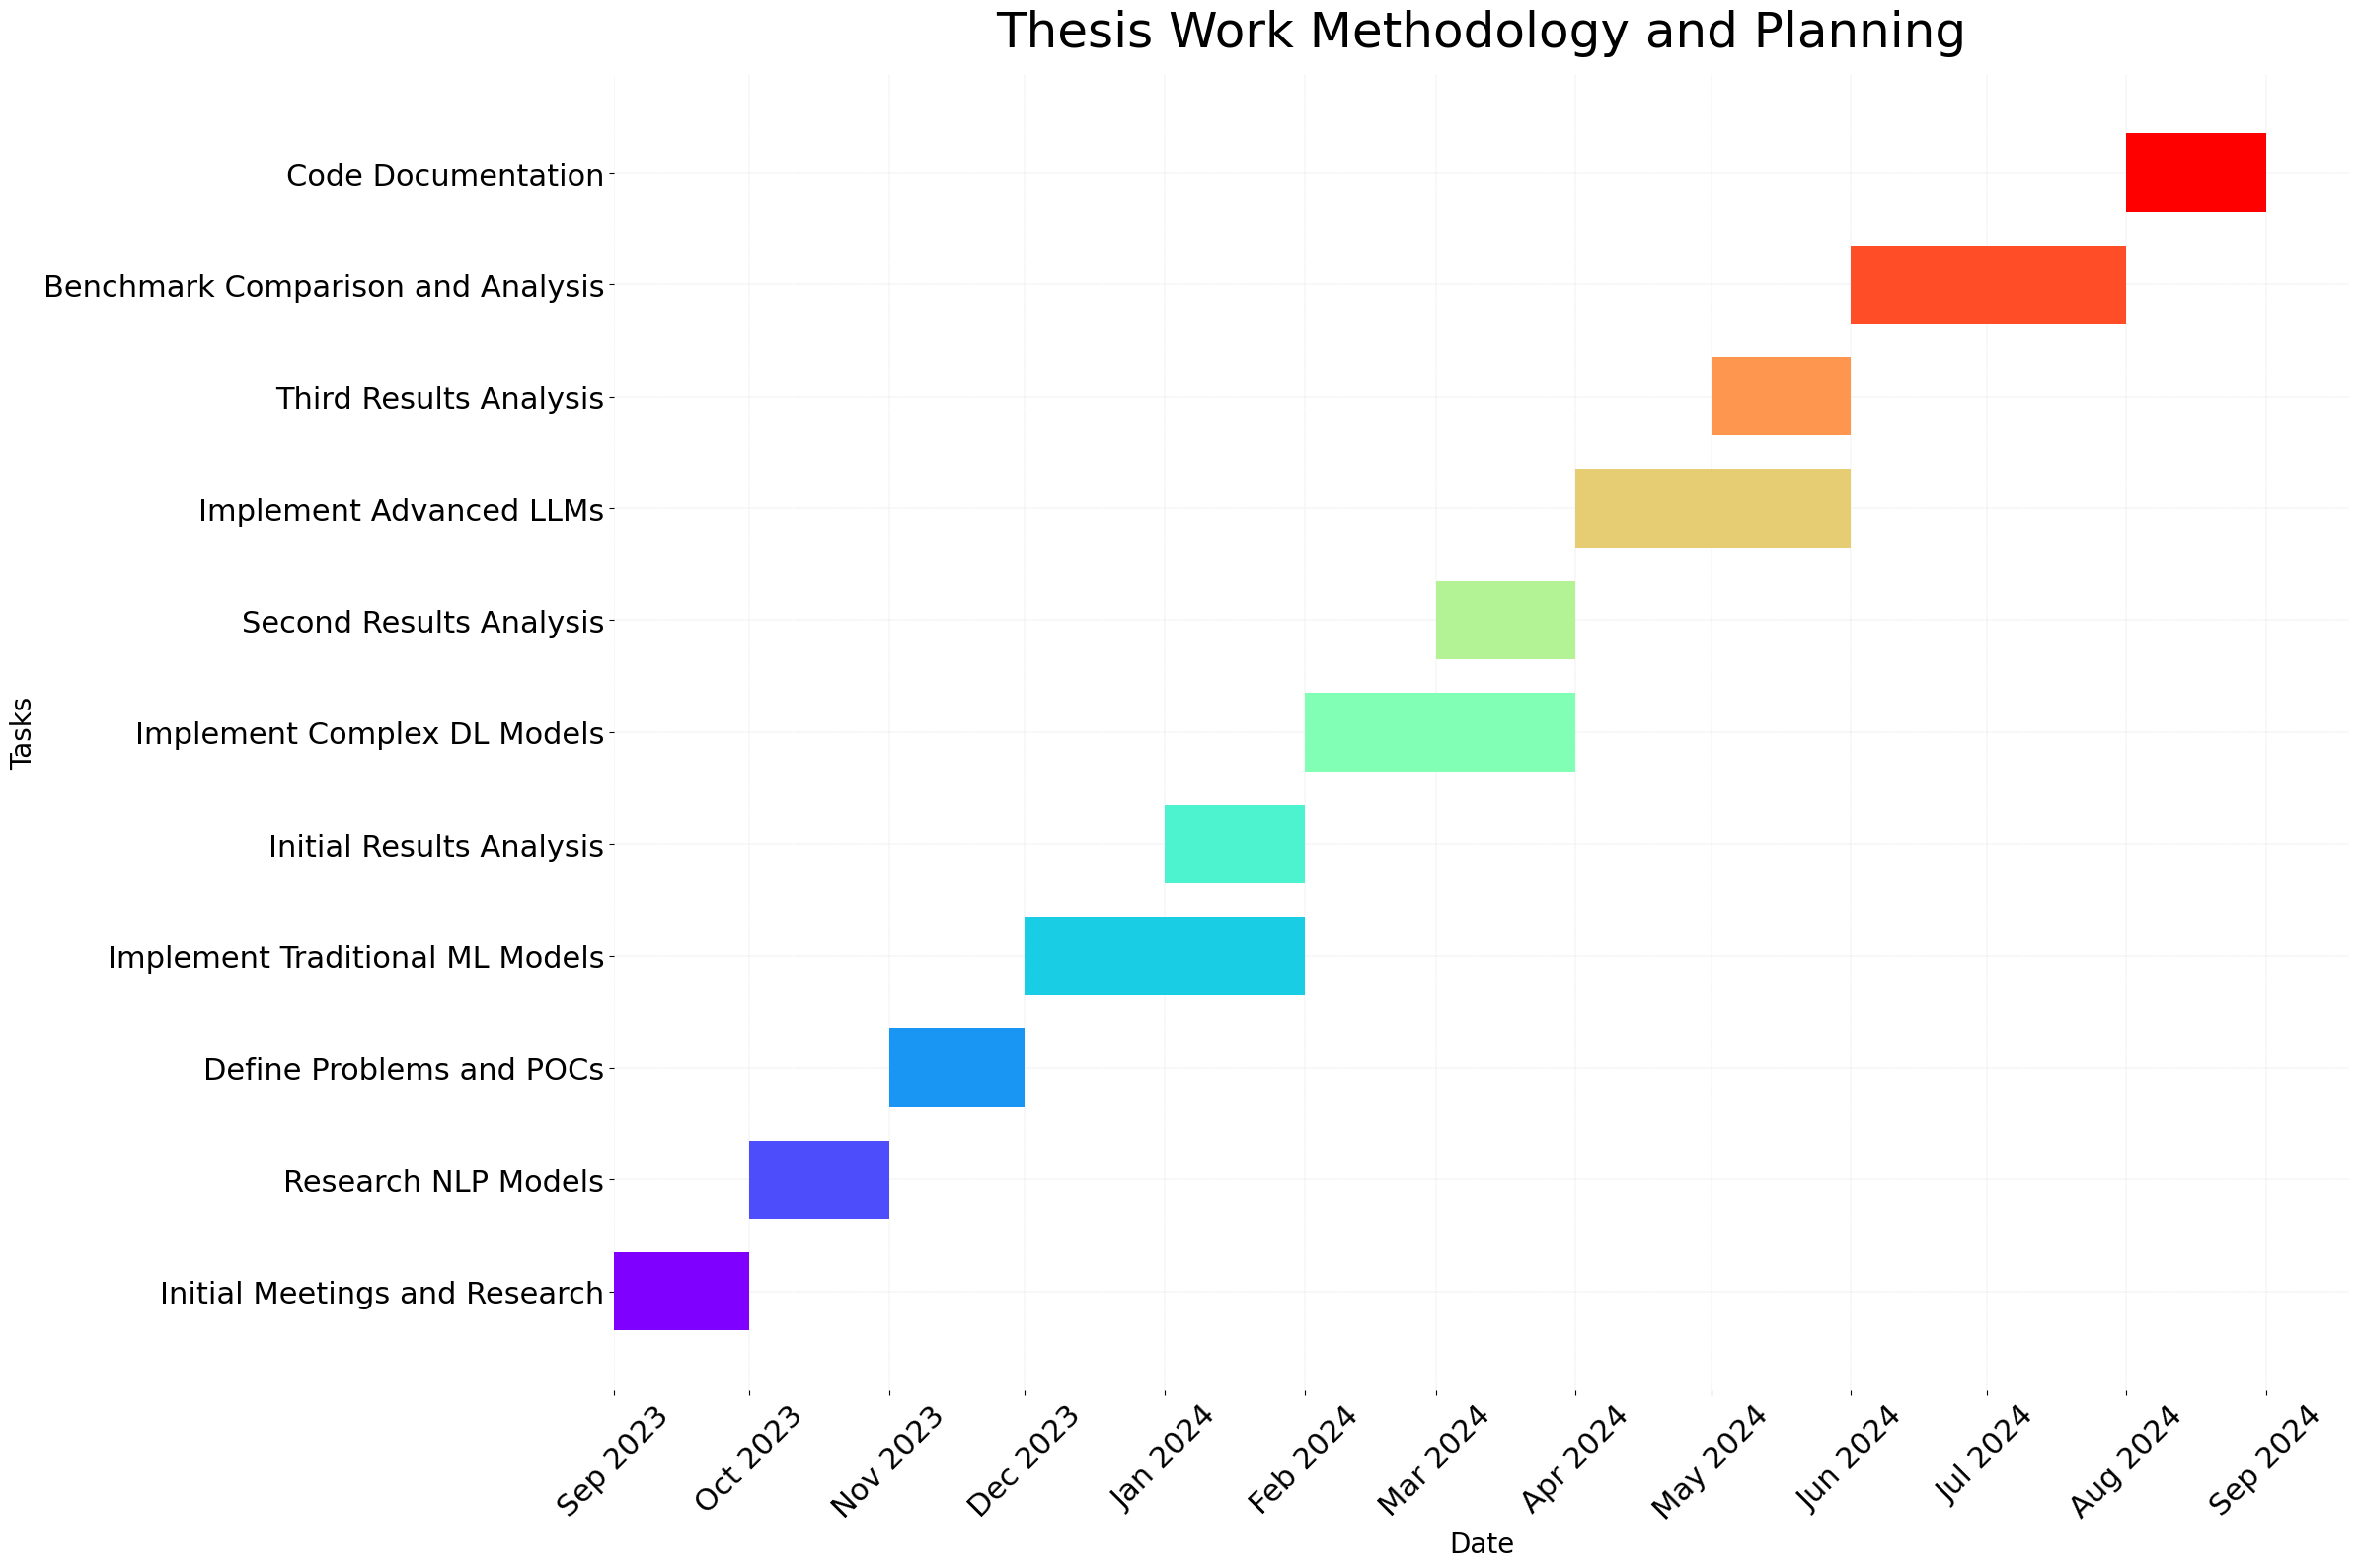

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import numpy as np

# Define the data
data = {
    'Task': ['Initial Meetings and Research', 'Research NLP Models', 'Define Problems and POCs',
             'Implement Traditional ML Models', 'Initial Results Analysis', 'Implement Complex DL Models',
             'Second Results Analysis', 'Implement Advanced LLMs', 'Third Results Analysis',
             'Benchmark Comparison and Analysis', 'Code Documentation'],
    'Start': pd.to_datetime(['2023-09', '2023-10', '2023-11', '2023-12', '2024-01', '2024-02',
                             '2024-03', '2024-04', '2024-05', '2024-06', '2024-08']),
    'End': pd.to_datetime(['2023-10', '2023-11', '2023-12', '2024-02', '2024-02', '2024-04',
                           '2024-04', '2024-06', '2024-06', '2024-08', '2024-09'])
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort tasks by the start date
df.sort_values(by='Start', inplace=True)

# Plot the Gantt chart
fig, ax = plt.subplots(figsize=(24, 16))

# Create a bar for each task using a more muted color palette
colors = plt.cm.rainbow(np.linspace(0, 1, len(df['Task'])))
for i, (task, start, end) in enumerate(zip(df['Task'], df['Start'], df['End'])):
    ax.barh(i, date2num(end) - date2num(start), left=date2num(start), color=colors[i], height=0.7, zorder=3)

# Set the yticks and labels
ax.set_yticks(np.arange(len(df['Task'])))
ax.set_yticklabels(df['Task'], fontsize=22)

# Format the date axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45, fontsize=22)

# Minimalist gridlines
ax.grid(True, which='major', linestyle='--', linewidth=0.3, color='lightgray', zorder=1)
ax.grid(False, which='minor')

# Remove spines to make it more minimalistic
for spine in ax.spines.values():
    spine.set_visible(False)

# Set labels and title
plt.xlabel('Date', fontsize=20)
plt.ylabel('Tasks', fontsize=20)
plt.title('Thesis Work Methodology and Planning', fontsize=36, pad=20)

plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("../../../IMAGES/work_methodology-planning.pdf", format='pdf')


plt.show()


## Load Data

In [5]:
# Load data
data = "../data/BBDD_SeAcabo.csv" # "data/BBDD_SeAcabo.csv" "AMI_IBEREVAL2018/es_AMI_TrainingSet_NEW.csv"
df = load_data(data, "")

## Target Categories

### Análisis General

#### Support of Classes

- Before Preprocessing

In [6]:
# Support of classes
print(df['Análisis General'].value_counts())

Análisis General
Comentario Positivo    2117
Comentario Negativo     435
Comentario Neutro       120
Name: count, dtype: int64


- After Preprocessing

In [7]:
filtered_df, labels_names = process_data(df, "analisis_general", "")

c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['view_count_scaled'] = scaler.fit_transform(df[['view_count']])
c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mention_count'] = df['user_mentions'].apply(count_user_mentions)
c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_dat


Soporte de etiquetas con nombres originales:
Comentario Positivo: 1283
Comentario Negativo: 367


c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text_processed'] = df['full_text'].apply(normalize_text)
c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = labels


In [8]:
filtered_df, labels_names = filter_by_type(df, "analisis_general", "") ## wrong


Soporte de etiquetas con nombres originales:
Comentario Positivo: 2117
Comentario Negativo: 435


c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = labels


#### Plots

In [9]:
# Asumiendo que filtered_df es tu DataFrame ya filtrado
class_counts = filtered_df['Análisis General'].value_counts()

# Decidir qué clases destacar
highlight_classes = ['Comentario Negativo']

default_color = "#1a2e49"  # Color for regular bars
highlight_color = "#fd7b6e"  # Color for highlighted languages

# Asignar colores a cada barra
colors = [highlight_color if cls in highlight_classes else default_color for cls in class_counts.index]

- Bar Chart

C:\Users\jorge\AppData\Local\Temp\ipykernel_30208\1158436564.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=class_counts.index, x=class_counts.values, palette=colors)


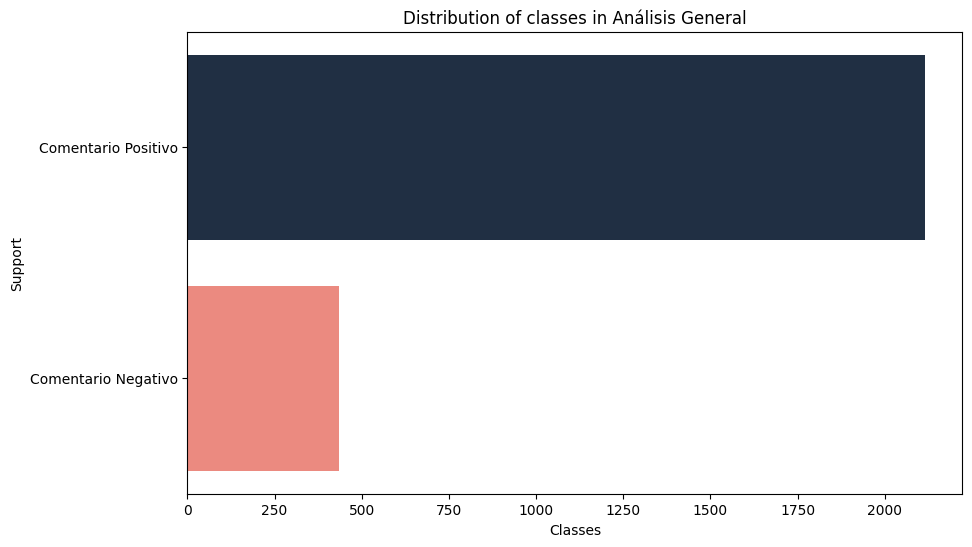

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(y=class_counts.index, x=class_counts.values, palette=colors)
plt.title('Distribution of classes in Análisis General')
plt.xlabel('Classes')
plt.ylabel('Support')
plt.xticks(rotation=0)
plt.show()

- Pie Chart

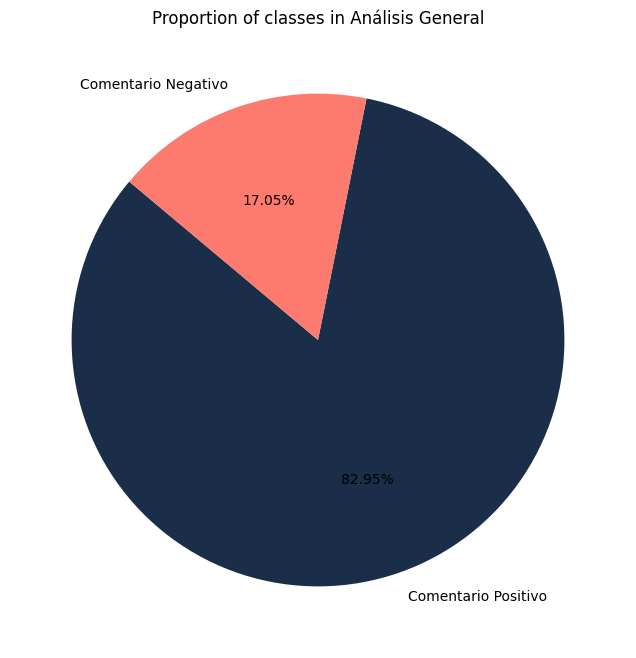

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', startangle=140, colors=colors)
plt.title('Proportion of classes in Análisis General')
plt.show()

### Contenido Negativo

#### Support of Classes

- Before Processing

In [12]:
# Support of classes
print(df['Contenido Negativo'].value_counts())

Contenido Negativo
Desprestigiar Deportista Autora    180
Desprestigiar Víctima               89
Desprestigiar Acto                  81
Insultos                            70
Sexualización / Objetivización       8
Estereotipos de Género               6
Violencia de Género                  1
Name: count, dtype: int64


- After Processing

In [13]:
filtered_df, labels_names = process_data(df, "contenido_negativo", "") ## wrong

c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['view_count_scaled'] = scaler.fit_transform(df[['view_count']])
c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mention_count'] = df['user_mentions'].apply(count_user_mentions)
c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_dat


Soporte de etiquetas con nombres originales:
Desprestigiar Víctima: 71
Desprestigiar Acto: 73
Insultos: 60
Desprestigiar Deportista Autora: 148


c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text_processed'] = df['full_text'].apply(normalize_text)
c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Contenido Negativo'] = df['Contenido Negativo'].where(df['Contenido Negativo'].isin(etiquetas))


In [14]:
filtered_df, labels_names = filter_by_type(df, "contenido_negativo", "")


Soporte de etiquetas con nombres originales:
Desprestigiar Víctima: 89
Desprestigiar Acto: 81
Insultos: 70
Desprestigiar Deportista Autora: 180


c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Contenido Negativo'] = df['Contenido Negativo'].where(df['Contenido Negativo'].isin(etiquetas))


#### Plots

In [15]:
# Asumiendo que filtered_df es tu DataFrame ya filtrado
class_counts = filtered_df['Contenido Negativo'].value_counts()

# Decidir qué clases destacar
highlight_classes = ['Insultos']

default_color = "#1a2e49"  # Color for regular bars
highlight_color = "#fd7b6e"  # Color for highlighted languages

# Asignar colores a cada barra
colors = [highlight_color if cls in highlight_classes else default_color for cls in class_counts.index]

- Bar Chart

C:\Users\jorge\AppData\Local\Temp\ipykernel_30208\671644466.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=class_counts.index, x=class_counts.values, palette=colors)


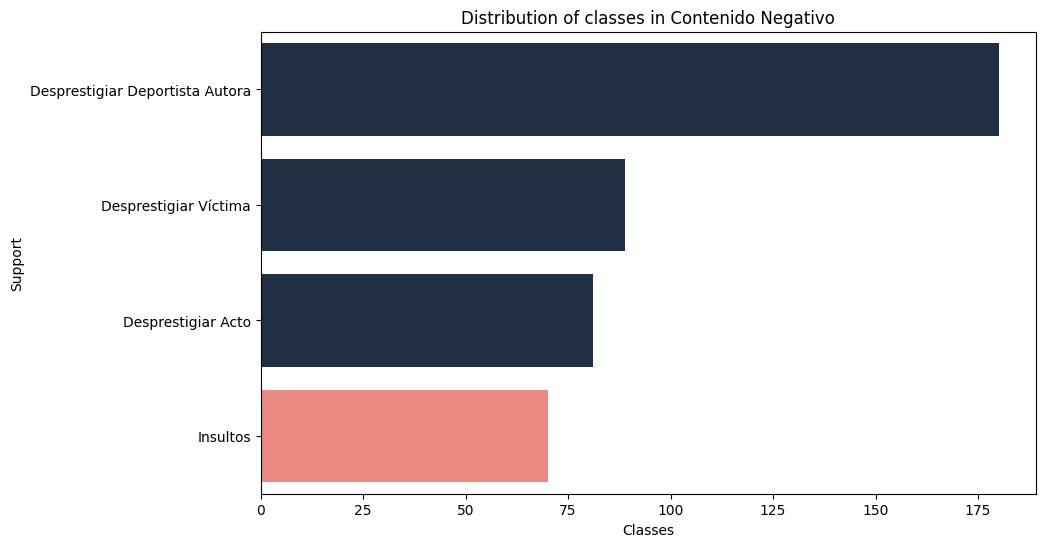

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(y=class_counts.index, x=class_counts.values, palette=colors)
plt.title('Distribution of classes in Contenido Negativo')
plt.xlabel('Classes')
plt.ylabel('Support')
plt.xticks(rotation=0)
plt.show()

- Pie Chart

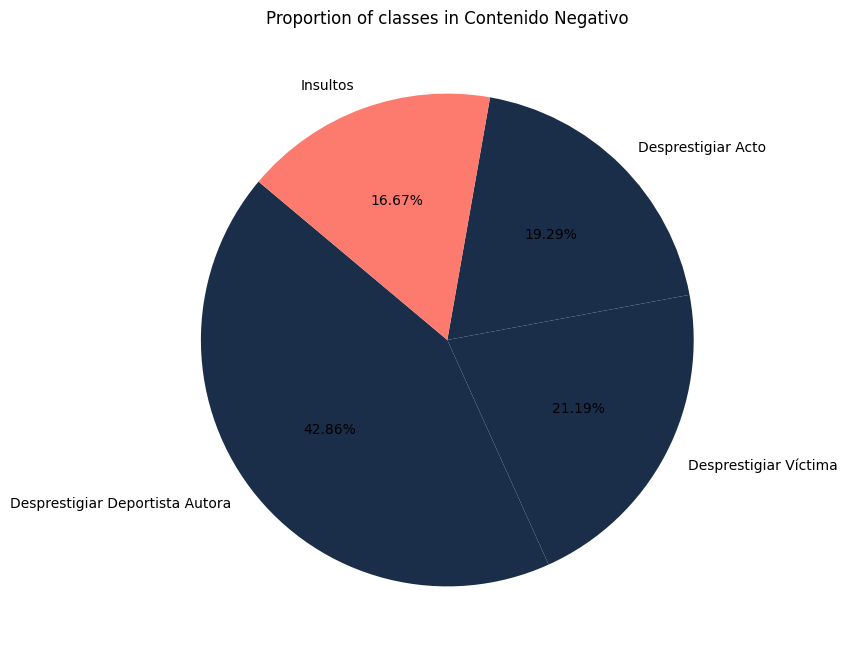

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', startangle=140, colors=colors)
plt.title('Proportion of classes in Contenido Negativo')
plt.show()

### Insultos

#### Support of Classes

- Before Processing

In [18]:
# Support of classes
print(df['Insultos'].value_counts())

Insultos
Deseo de Dañar           67
Genéricos                64
Sexistas/misóginos       53
Sarcasmo                 31
Imposición               13
Objetivización Sexual     4
Name: count, dtype: int64


- After Processing

In [19]:
filtered_df, labels_names = process_data(df, "insultos", "")

c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['view_count_scaled'] = scaler.fit_transform(df[['view_count']])
c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mention_count'] = df['user_mentions'].apply(count_user_mentions)
c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_dat


Soporte de etiquetas con nombres originales:
Sexistas/misóginos: 48
Genéricos: 100
Deseo de Dañar: 58


c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text_processed'] = df['full_text'].apply(normalize_text)


In [20]:
filtered_df, labels_names = filter_by_type(df, "insultos", "") ## wrong


Soporte de etiquetas con nombres originales:
Sexistas/misóginos: 53
Genéricos: 112
Deseo de Dañar: 67


#### Plots

In [21]:
# Asumiendo que filtered_df es tu DataFrame ya filtrado
class_counts = filtered_df['Insultos'].value_counts()

# Decidir qué clases destacar
highlight_classes = ['Genéricos']

default_color = "#1a2e49"  # Color for regular bars
highlight_color = "#fd7b6e"  # Color for highlighted languages

# Asignar colores a cada barra
colors = [highlight_color if cls in highlight_classes else default_color for cls in class_counts.index]

- Bar Chart

C:\Users\jorge\AppData\Local\Temp\ipykernel_30208\1389417758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=class_counts.index, x=class_counts.values, palette=colors)


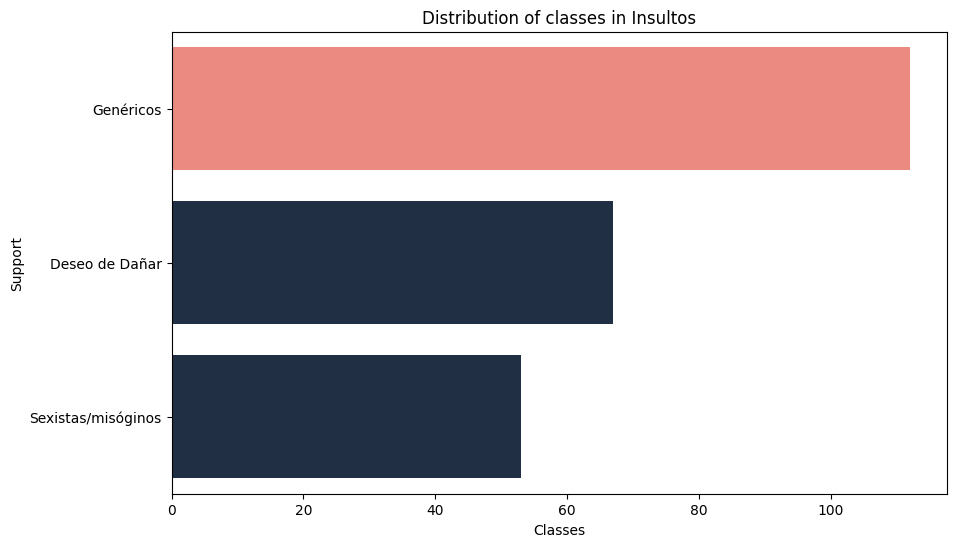

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(y=class_counts.index, x=class_counts.values, palette=colors)
plt.title('Distribution of classes in Insultos')
plt.xlabel('Classes')
plt.ylabel('Support')
plt.xticks(rotation=0)
plt.show()

- Pie Chart

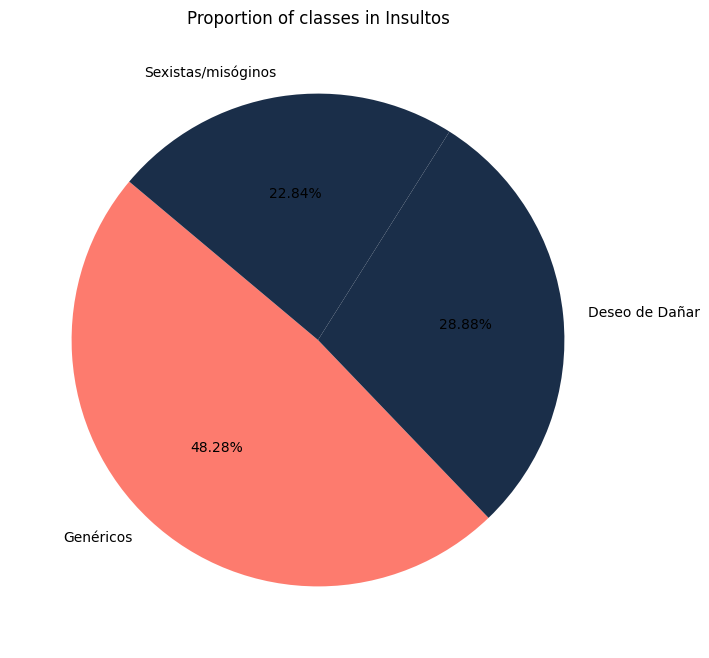

In [23]:
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', startangle=140, colors=colors)
plt.title('Proportion of classes in Insultos')
plt.show()

### Relationship

In [24]:
filtered_df, labels_names = filter_by_type(df, "analisis_general", "")
filtered_df, labels_names = filter_by_type(filtered_df, "contenido_negativo", "")
filtered_df, labels_names = filter_by_type(df, "insultos", "")

# Filtrar para "Comentario Negativo" en "Análisis General"
com_neg_df = filtered_df[filtered_df['Análisis General'] == 'negativo']


Soporte de etiquetas con nombres originales:
Comentario Positivo: 2117
Comentario Negativo: 435

Soporte de etiquetas con nombres originales:
Desprestigiar Víctima: 89
Desprestigiar Acto: 81
Insultos: 70
Desprestigiar Deportista Autora: 180

Soporte de etiquetas con nombres originales:
Sexistas/misóginos: 53
Genéricos: 112
Deseo de Dañar: 67


c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = labels
c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Contenido Negativo'] = df['Contenido Negativo'].where(df['Contenido Negativo'].isin(etiquetas))


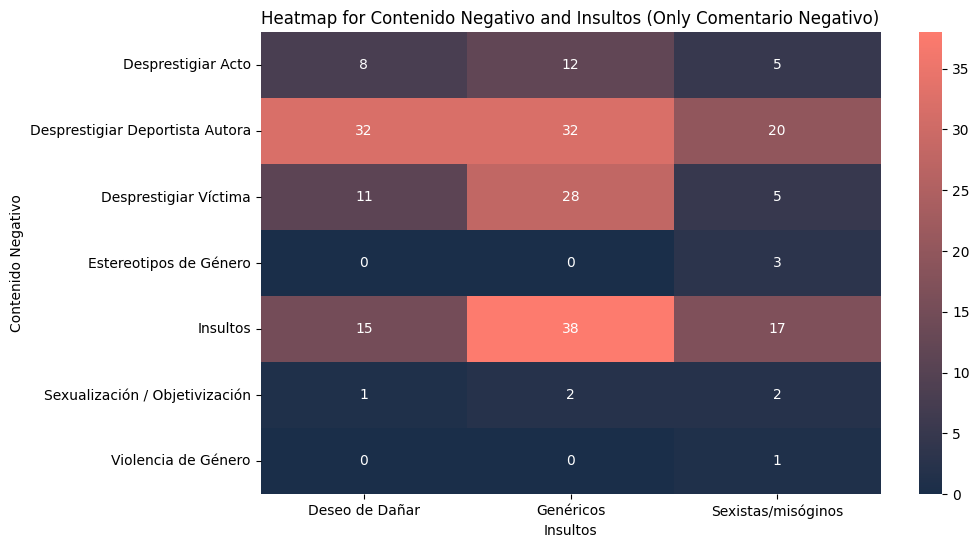

In [25]:
# Crear una tabla de contingencia
pivot_table = pd.crosstab(index=filtered_df['Contenido Negativo'], columns=filtered_df['Insultos'])

# Colores personalizados
default_color = "#1a2e49"  # Color for regular values
highlight_color = "#fd7b6e"  # Color for high values

# Crear una paleta de colores personalizada
cmap = LinearSegmentedColormap.from_list("custom_cmap", [default_color, highlight_color])

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap=cmap, fmt='d')
plt.title('Heatmap for Contenido Negativo and Insultos (Only Comentario Negativo)')
plt.ylabel('Contenido Negativo')
plt.xlabel('Insultos')
plt.show()

## Statistical Summary

In [26]:
# Resumen estadístico de variables numéricas
print(df.describe())

          view_count  bookmark_count  favorite_count  reply_count  \
count    2672.000000     2672.000000     2672.000000  2672.000000   
mean     6658.452096        0.180763       33.035554     1.344311   
std     23688.581016        1.980785      195.174855     8.849447   
min         0.000000        0.000000        0.000000     0.000000   
25%        62.000000        0.000000        0.000000     0.000000   
50%       223.000000        0.000000        1.000000     0.000000   
75%      1148.000000        0.000000        4.000000     0.000000   
max    352539.000000       55.000000     4459.000000   289.000000   

       retweet_count  quote_count  followers_count  following_count  \
count    2672.000000  2672.000000     2.672000e+03      2672.000000   
mean        2.323728     0.088698     1.639193e+04      2534.236527   
std        19.356214     0.748386     8.267323e+04     11641.661409   
min         0.000000     0.000000     0.000000e+00         0.000000   
25%         0.000000   

ValueError: List of boxplot statistics and `positions` values must have same the length

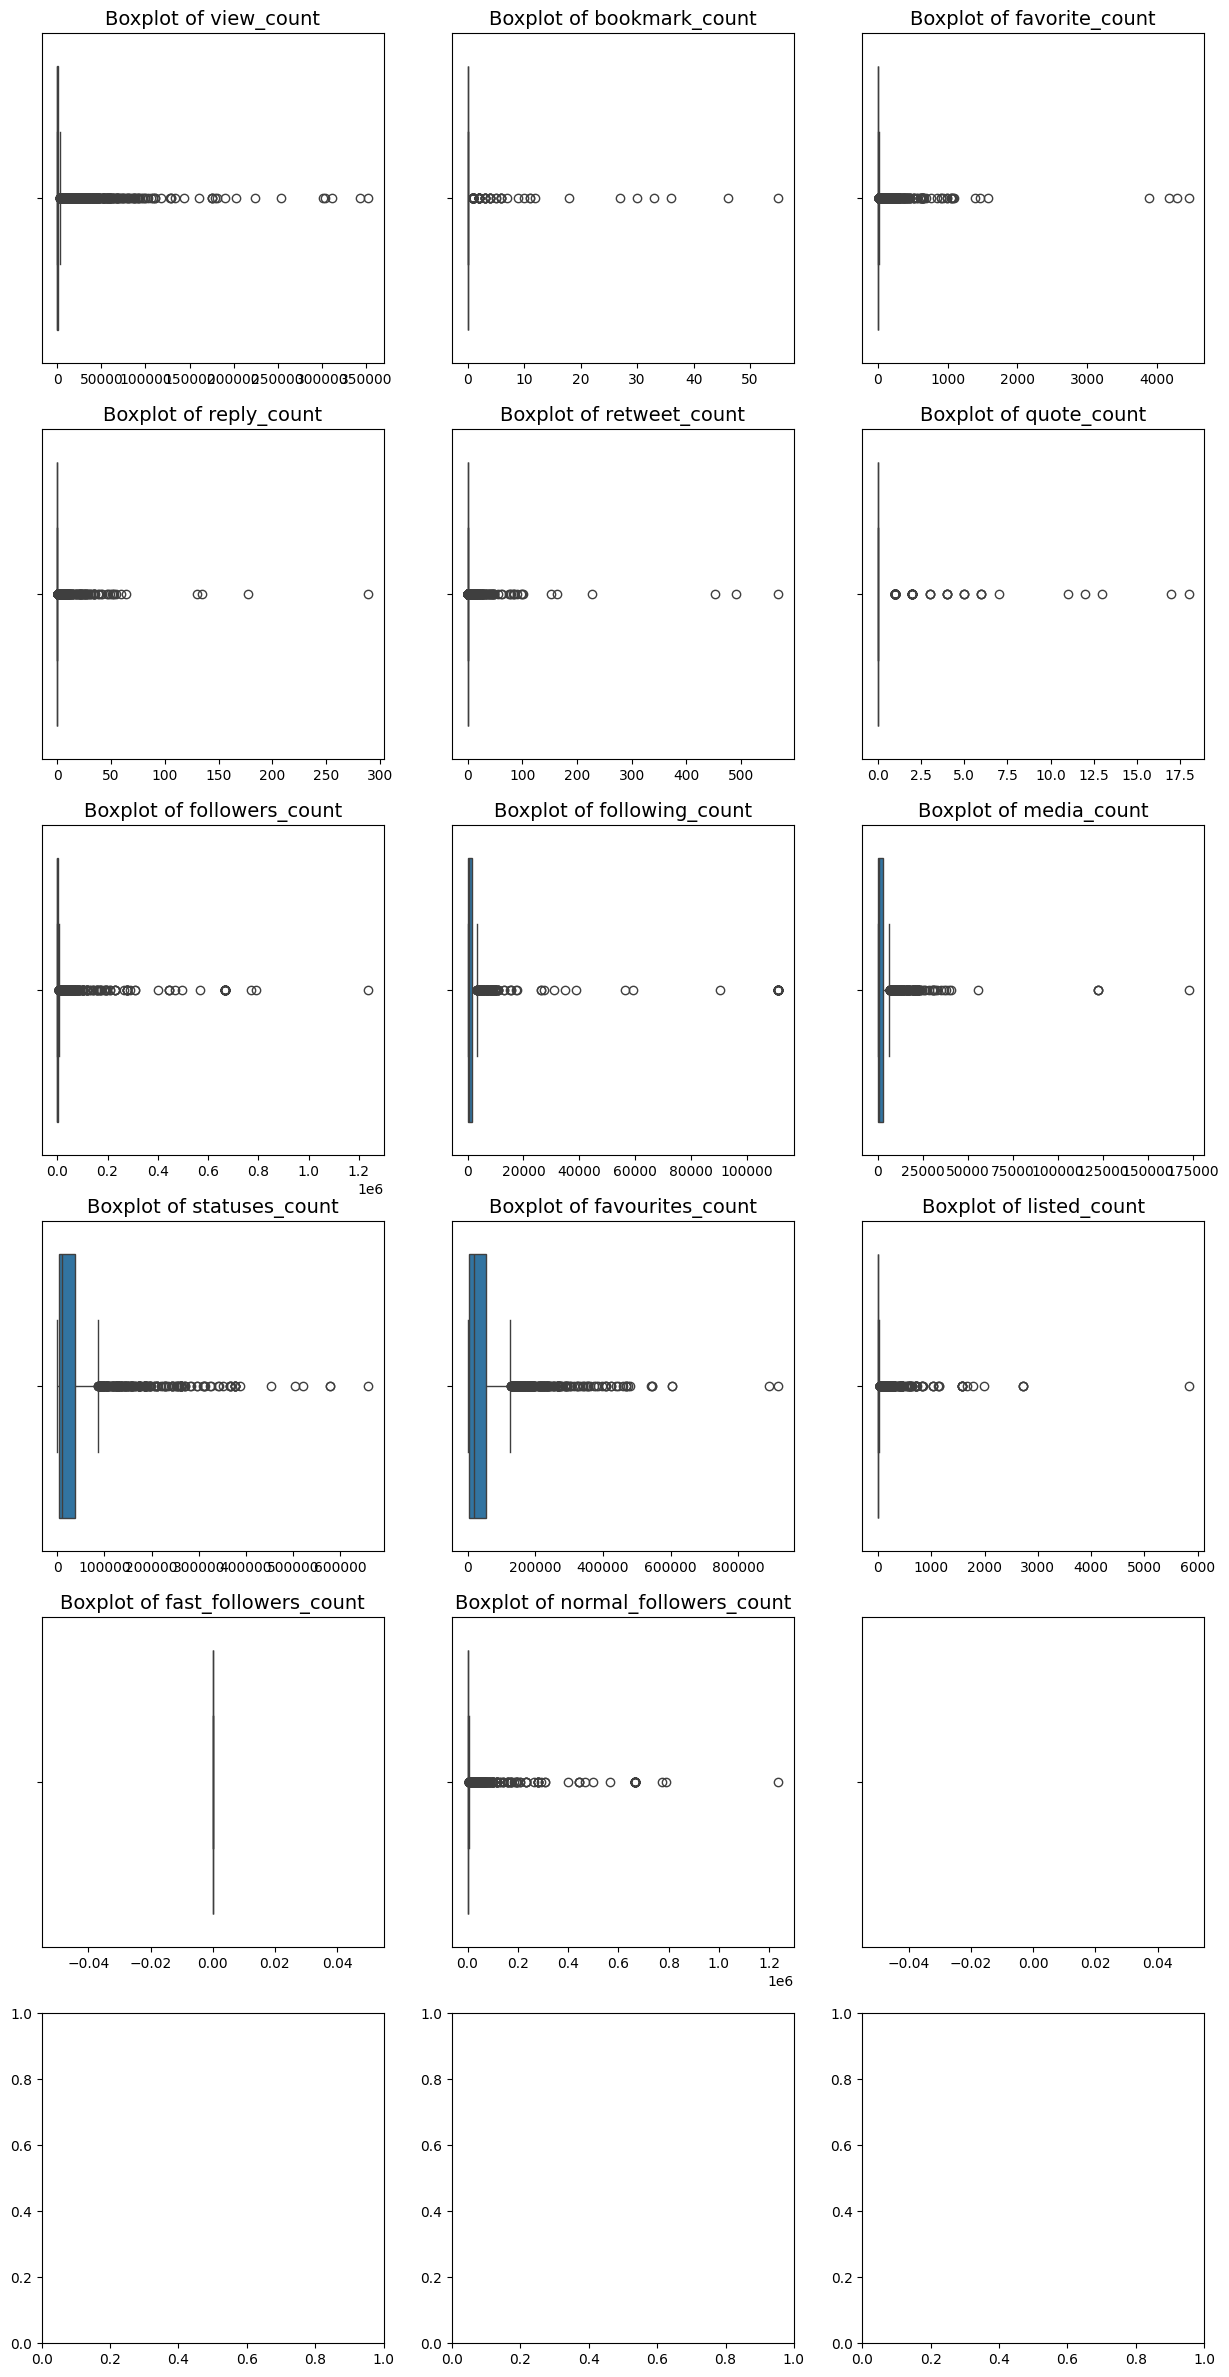

In [27]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Set the number of subplots based on the number of numeric columns
n_cols = 3  # Number of columns in the grid
n_rows = (len(numeric_cols.columns) + n_cols - 1) // n_cols  # Calculate rows needed

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

# Flatten the array of axes
axes = axes.flatten()

# Iterate over the numeric columns and create a boxplot for each one
for i, col in enumerate(numeric_cols.columns):
    sns.boxplot(data=numeric_cols, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# If there are any subplots not used, hide them
for ax in axes[len(numeric_cols.columns):]:
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## Detect Languages

#### Languages Counts

In [29]:
# Compute counts
lang_counts = df['lang'].value_counts()

# Compute the percentages of the total
lang_percentages = (lang_counts / lang_counts.sum()) * 100

# Combine counts and percentages
lang_stats = pd.DataFrame({
    'Count': lang_counts,
    'Percentage': lang_percentages
})

print(lang_stats)

      Count  Percentage
lang                   
es     1687   63.136228
qme     530   19.835329
en      166    6.212575
ca      110    4.116766
pt       49    1.833832
und      43    1.609281
eu       18    0.673653
it       15    0.561377
sv       12    0.449102
in       11    0.411677
qam       8    0.299401
fr        6    0.224551
ar        4    0.149701
nl        3    0.112275
tl        2    0.074850
hu        2    0.074850
ht        1    0.037425
lt        1    0.037425
tr        1    0.037425
hi        1    0.037425
cy        1    0.037425
fi        1    0.037425


In [30]:
df[df["lang"]=="und"]

,Autora,full_text,Análisis General,Contenido Negativo,Insultos,Insulto 1,Insulto 2,Insulto 3,Emisor,Contenido AV.,...,fast_followers_count,normal_followers_count,followed_by,following,location,profile_banner_url,profile_url,avatar_url,verified,is_blue_verified
148,Jenni Hermoso,"@Jennihermoso @jacintodavila ¡Fuerza, Jenni!",Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,171007,NaN,NaN,"Caracas, Venezuela",https://pbs.twimg.com/profile_banners/12493262...,https://www.twitter.com/lubrio,https://pbs.twimg.com/profile_images/184971246...,False,False
297,Alexia Putellas,@alexiaputellas @Jennihermoso LFGGGGGGG❤️❤️❤️,Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3443,NaN,NaN,Lagos Nigeria,https://pbs.twimg.com/profile_banners/42518336...,https://www.twitter.com/Iam_muizzsoliu,https://pbs.twimg.com/profile_images/169106712...,False,True
299,Alexia Putellas,"@alexiaputellas @Jennihermoso Dilo, Alexia.",Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,58588,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/11363697...,https://www.twitter.com/Reycholosimeone,https://pbs.twimg.com/profile_images/160408465...,False,True
370,Alexia Putellas,@alexiaputellas @Jennihermoso Big 🤝 https://t....,Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3985,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/15208691...,https://www.twitter.com/EleojoFranklin,https://pbs.twimg.com/profile_images/168964303...,False,True
405,FUTPRO,@futpro_es @SEFutbolFem @Jennihermoso Jódete R...,Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1729,NaN,NaN,España,https://pbs.twimg.com/profile_banners/26474030...,https://www.twitter.com/Xaviyago,https://pbs.twimg.com/profile_images/161186108...,False,True
572,FUTPRO,@futpro_es @SEFutbolFem @Jennihermoso RIP @rfef,Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,104,NaN,NaN,Madrid,NaN,https://www.twitter.com/bichino_o,https://pbs.twimg.com/profile_images/616550768...,False,False
608,Aitana Bonmati,@AitanaBonmati MVP,Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,67550,NaN,NaN,"Principado de Asturias, España",https://pbs.twimg.com/profile_banners/39043798...,https://www.twitter.com/elopi23,https://pbs.twimg.com/profile_images/144695879...,False,True
617,Aitana Bonmati,@elopi23 @AitanaBonmati PLM,Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3452,NaN,NaN,Galicia,https://pbs.twimg.com/profile_banners/14532808...,https://www.twitter.com/Basilio_rm,https://pbs.twimg.com/profile_images/168405211...,False,True
764,Aitana Bonmati,@AitanaBonmati Brava!!!,Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,657,NaN,NaN,"No soy de aquí, ni soy de allá",https://pbs.twimg.com/profile_banners/16484064...,https://www.twitter.com/DaCaRoC,https://pbs.twimg.com/profile_images/164911186...,False,False
859,Cata Coll,"@catacoll2001 @Jennihermoso .,. https://t.co/C...",Comentario Positivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9818,NaN,NaN,Cataluña ✊💜💛♥️✊,https://pbs.twimg.com/profile_banners/14003913...,https://www.twitter.com/Giorgio7716,https://pbs.twimg.com/profile_images/164212369...,False,False


#### Plots

In [31]:
# Languages to highlight
highlight_langs = ['es', 'cy', 'ht', 'in', 'lt', 'qam', 'tl', 'und']

# Colors for bars
default_color = "#2b2d42"
highlight_color = "#75C2F6" 


# Assign colors to each language based on whether they are in the highlight list
bar_colors = [highlight_color if lang in highlight_langs else default_color for lang in lang_counts.index]

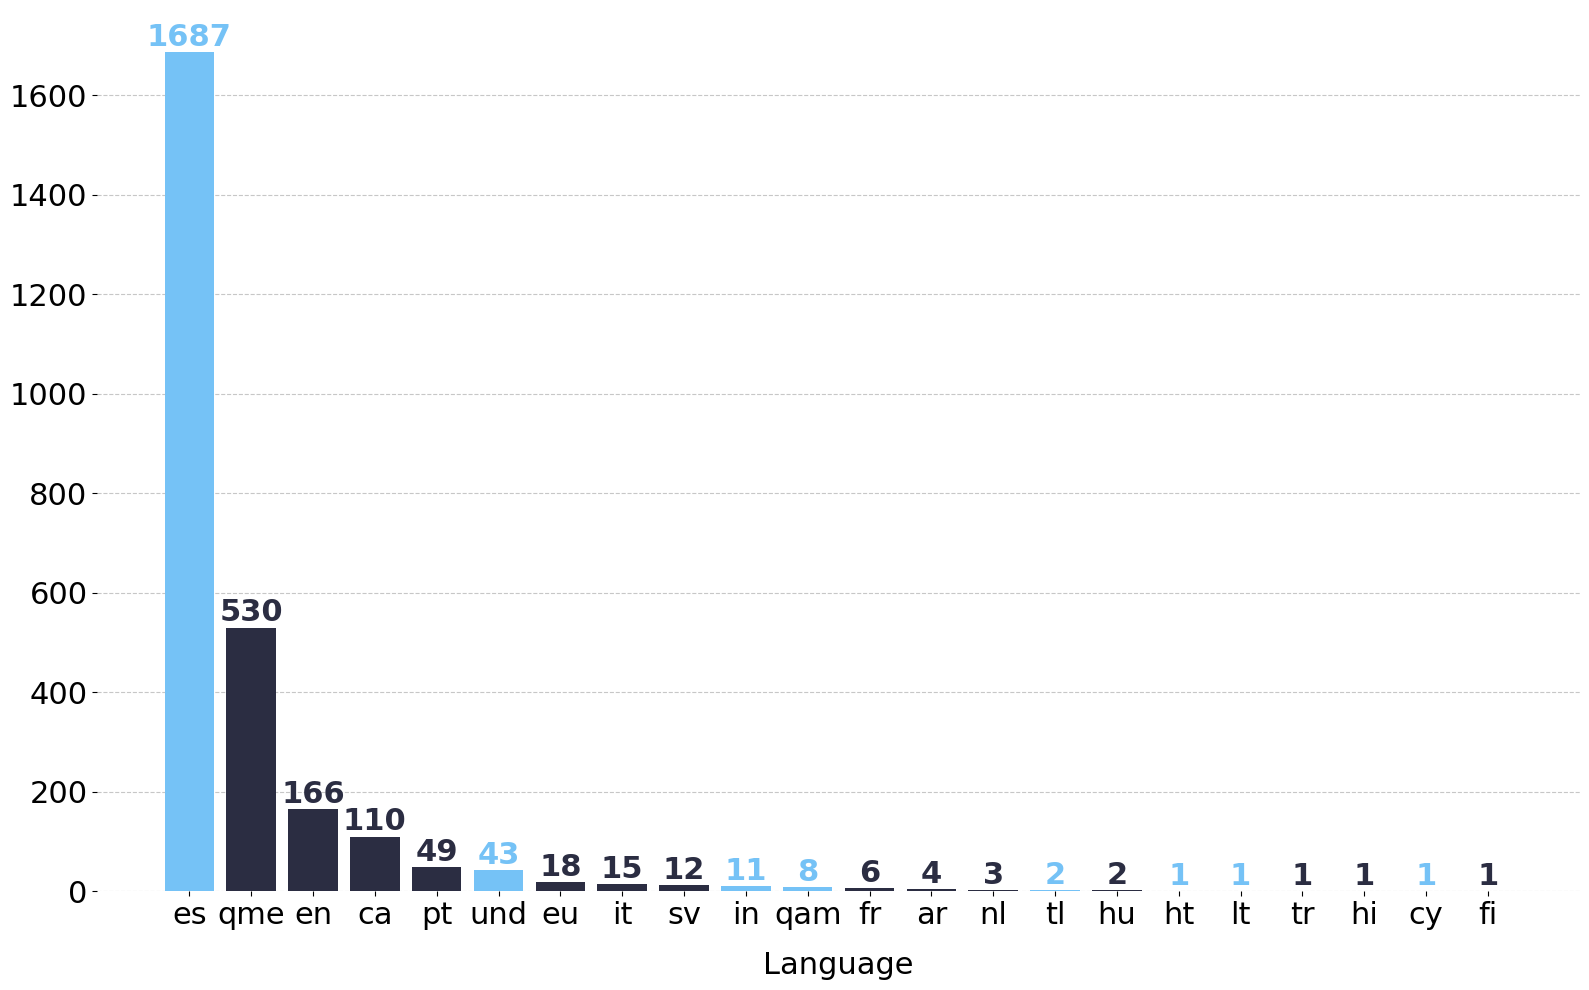

In [33]:
import matplotlib.pyplot as plt

# Create the histogram with enhanced aesthetics
plt.figure(figsize=(16, 10))

# Plot the bar chart with specified colors and zorder
bars = plt.bar(lang_counts.index, lang_counts.values, color=bar_colors, zorder=3)

# Add title and labels with improved font sizes and styles
# plt.title('Language Counts for Tweets', fontsize=36, pad=20)
plt.xlabel('Language', fontsize=22, labelpad=15)
# plt.ylabel('Count', fontsize=18, labelpad=15)

# Rotate x-ticks for better readability and adjust their font size
plt.xticks(rotation=0, fontsize=22)

# Customize y-ticks for better visual appeal
plt.yticks(fontsize=22)

# Add a grid to improve readability, only on the y-axis and behind bar
plt.grid(axis='x', linestyle='')  # Disable vertical grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)  # Ensure only horizontal lines are shown

# Add value labels on top of the bars for better data visibility
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval),
        ha='center', va='bottom', fontsize=22, fontweight='bold',
        color=bar.get_facecolor(),  # Match text color with bar color
        zorder=4  # Ensure the text is above the bars
    )

# Get current axis to modify the spines (the lines around the plot)
ax = plt.gca()

# Remove all spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adjust layout to avoid clipping of labels and titles
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig("../../../IMAGES/languages_counts.pdf", format='pdf')

# Save the plot as a PNG file
plt.savefig("../../../IMAGES/languages_counts.png", format='png', transparent=True)

# Display the plot
plt.show()


## Sender

In [ ]:
# Compute counts - faltan NAs
sender_counts = df['Emisor'].value_counts()

# Compute the percentages of the total
sender_percentages = (sender_counts / sender_counts.sum()) * 100

# Combine counts and percentages
sender_stats = pd.DataFrame({
    'Count': sender_counts,
    'Percentage': sender_percentages
})

print(sender_stats)

              Count  Percentage
Emisor                         
Fake            252   63.636364
Hombre          106   26.767677
Mujer            36    9.090909
Organización      1    0.252525
Falsa             1    0.252525


## Timestamp

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])

C:\Users\jorge\AppData\Local\Temp\ipykernel_14256\329245698.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


### Per Day

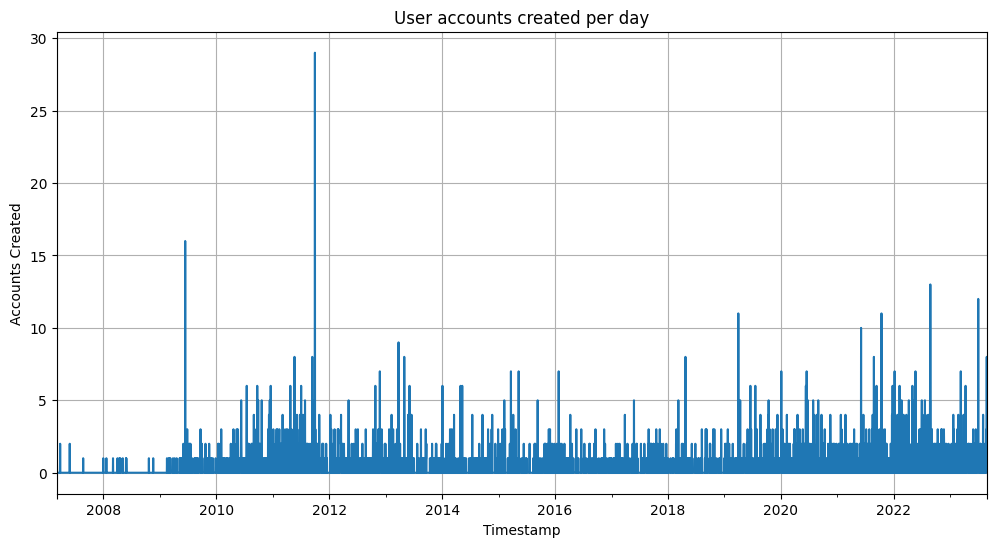

In [ ]:
# Agrupar por fecha y contar entradas
daily_counts = df.set_index('created_at').resample('D').size()

# Plotear la serie temporal
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('User accounts created per day')
plt.xlabel('Timestamp')
plt.ylabel('Accounts Created')
plt.grid(True)
plt.show()

## Tweets Analysis

In [ ]:
# Filter by lang
tweets_df = filter_by_lang(df)
# Normalize data
tweets_df = normalize_data(tweets_df)
# Add special tokens
#tweets_df = add_special_tokens(tweets_df)

c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['view_count_scaled'] = scaler.fit_transform(df[['view_count']])
c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mention_count'] = df['user_mentions'].apply(count_user_mentions)
c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_dat

In [ ]:
tweets = tweets_df['full_text_processed'].tolist()

In [ ]:
stop_words = set(stopwords.words('spanish'))

### Word Cloud

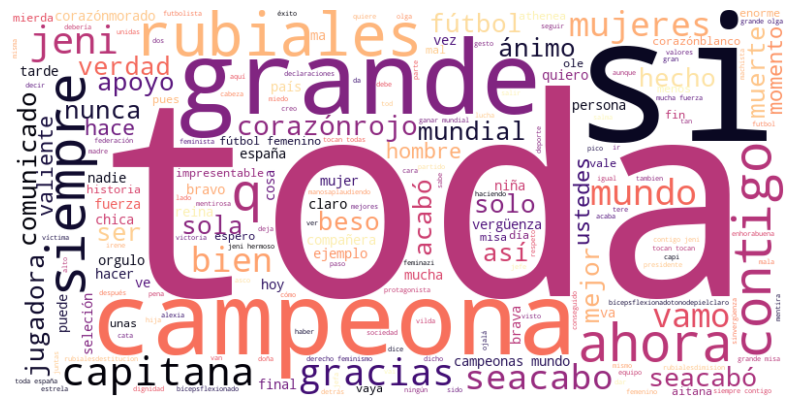

In [ ]:
# Crear la lista de palabras
words = [word for tweet in tweets for word in tweet.split()]
all_words = ' '.join(words)

# Generar el WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap = "magma").generate(all_words)

# Mostrar el WordCloud
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Top 10 Most Common Words

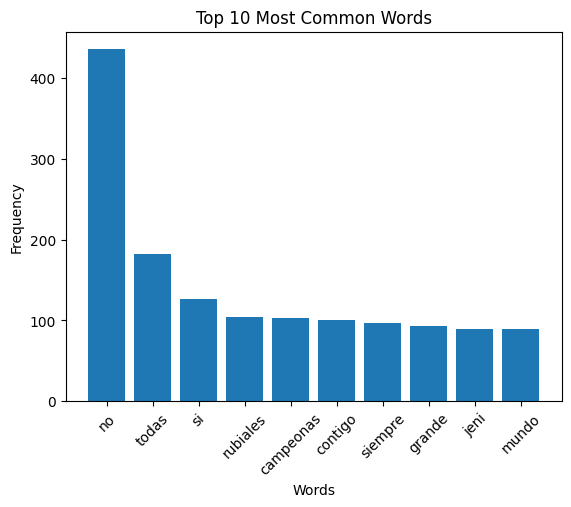

In [ ]:
# Filter out words that start with '@' or '#' and are not in stop words
count = Counter(words)
most_common = count.most_common(10)

words, frequencies = zip(*most_common)
plt.bar(words, frequencies)
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Words in Target Columns

In [ ]:
# Función para contar las palabras más comunes en una serie de textos
def get_most_common_words(tweets, top_n=10):
    words = [tweet for tweet in tweets]
    all_words = ' '.join(words).split()
    word_freq = Counter(all_words)
    return word_freq.most_common(top_n)

#### Análisis General

In [ ]:
# Agrupar tweets por la etiqueta y contar las palabras más comunes para cada etiqueta
ageneral_tweets,_ = filter_by_type(tweets_df, "analisis_general", "")
ageneral_tweets = ageneral_tweets.groupby('Análisis General')['full_text_processed']

most_common_words_by_label = {label: get_most_common_words(group_texts) for label, group_texts in ageneral_tweets}

# Imprimir las palabras más comunes por etiqueta
for label, common_words in most_common_words_by_label.items():
    print(f"Etiqueta '{label}':")
    for word, freq in common_words:
        print(f"  {word}: {freq}")
    print()



Soporte de etiquetas con nombres originales:
Comentario Positivo: 1283
Comentario Negativo: 367
Etiqueta 'Comentario Negativo':
  no: 203
  si: 63
  ahora: 38
  q: 37
  rubiales: 36
  beso: 31
  jeni: 29
  mundial: 23
  verdad: 21
  bien: 20

Etiqueta 'Comentario Positivo':
  no: 217
  todas: 157
  campeonas: 99
  contigo: 91
  grande: 91
  siempre: 87
  mundo: 73
  rubiales: 64
  gracias: 61
  si: 59



c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = labels


#### Contenido Negativo

In [ ]:
# Agrupar tweets por la etiqueta y contar las palabras más comunes para cada etiqueta
cnegativo_tweets,_ = filter_by_type(tweets_df, "contenido_negativo", "")
cnegativo_tweets = cnegativo_tweets.groupby('Contenido Negativo')['full_text_processed']

most_common_words_by_label = {label: get_most_common_words(group_texts) for label, group_texts in cnegativo_tweets}

# Imprimir las palabras más comunes por etiqueta
for label, common_words in most_common_words_by_label.items():
    print(f"Etiqueta '{label}':")
    for word, freq in common_words:
        print(f"  {word}: {freq}")
    print()



Soporte de etiquetas con nombres originales:
Desprestigiar Víctima: 71
Desprestigiar Acto: 73
Insultos: 60
Desprestigiar Deportista Autora: 148
Etiqueta 'Desprestigiar Acto':
  no: 68
  rubiales: 16
  beso: 13
  si: 9
  bien: 8
  q: 8
  vergüenza: 7
  ver: 6
  mundial: 6
  mujeres: 6

Etiqueta 'Desprestigiar Deportista Autora':
  no: 71
  ahora: 22
  si: 18
  q: 15
  capitana: 11
  mundial: 10
  tarde: 10
  todas: 9
  mas: 6
  ir: 6

Etiqueta 'Desprestigiar Víctima':
  no: 37
  si: 25
  jeni: 21
  beso: 11
  ahora: 10
  rubiales: 9
  comunicado: 8
  mundo: 7
  q: 7
  hace: 7

Etiqueta 'Insultos':
  no: 22
  mujeres: 7
  vergüenza: 7
  mentirosa: 6
  feminazis: 6
  si: 6
  verdad: 6
  capitana: 6
  bien: 5
  mala: 5



c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Contenido Negativo'] = df['Contenido Negativo'].where(df['Contenido Negativo'].isin(etiquetas))


#### Insultos

In [ ]:
# Agrupar tweets por la etiqueta y contar las palabras más comunes para cada etiqueta
insults_tweets,_ = filter_by_type(tweets_df, "insultos", "")
insults_tweets = insults_tweets.groupby('Insultos')['full_text_processed']

most_common_words_by_label = {label: get_most_common_words(group_texts) for label, group_texts in insults_tweets}

# Imprimir las palabras más comunes por etiqueta
for label, common_words in most_common_words_by_label.items():
    print(f"Etiqueta '{label}':")
    for word, freq in common_words:
        print(f"  {word}: {freq}")
    print()



Soporte de etiquetas con nombres originales:
Genéricos: 261
Sexistas/misóginos: 48
Deseo de Dañar: 58
Etiqueta 'Deseo de Dañar':
  no: 19
  si: 10
  verdad: 5
  beso: 5
  rubiales: 5
  mundial: 4
  parece: 4
  mentir: 3
  pasó: 3
  ve: 3

Etiqueta 'Genéricos':
  no: 152
  si: 49
  ahora: 29
  rubiales: 26
  q: 25
  jeni: 24
  beso: 20
  mundial: 17
  capitana: 17
  bien: 15

Etiqueta 'Sexistas/misóginos':
  no: 32
  q: 9
  feminazis: 7
  beso: 6
  ahora: 6
  rubiales: 5
  mujeres: 5
  así: 5
  feministas: 4
  bien: 4



c:\Users\jorge\Desktop\UNI\4-CUARTO\4-2-TFG\CODE\Gender-Bias\MachineLearning\process_data.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Insultos'] = df['Insultos'].where(df['Insultos'].isin(etiquetas), other="Genéricos")
